In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
corpus = 'mrpc' # 'mrpc'/'manual'

folder_input_path = '/content/drive/My Drive/Colab Notebooks/5_Corpora/corpora/'
img_path = '/content/drive/My Drive/Colab Notebooks/5_Corpora/plots/'
csv_file_path = f'{corpus}-triplet-corpus.csv'

In [3]:
import pandas as pd

# Read the CSV file
df = pd.read_csv(folder_input_path + csv_file_path)
df.head()

,original,positive,negative,original_label,positive_label,negative_label,original_sentiment_label,original_sentiment_score,positive_sentiment_label,positive_sentiment_score,...,positive_chrf,negative_chrf,positive_chrfpp,negative_chrfpp,positive_mover,negative_mover,positive_bleurt,negative_bleurt,positive_cosine_similarity,negative_cosine_similarity
0,"Around 0335 GMT , Tab shares were up 19 cents ...","Tab shares jumped 20 cents , or 4.6 % , to set...",Tab shares managed a negligible climb of 19 ce...,NEU,POS,NEG,NEU,0.814170,POS,0.745833,...,1.730104,2.604167,1.730104,2.604167,1.0,1.0,0.531661,0.410957,0.883354,0.820657
1,"The Nasdaq had a weekly gain of 17.27 , or 1.2...",The tech-laced Nasdaq Composite .IXIC rallied ...,The Nasdaq's weekly gain was a disappointing 1...,NEU,POS,NEG,NEU,0.856692,POS,0.534849,...,7.331378,14.705882,7.331378,14.705882,1.0,1.0,0.380629,0.529987,0.517721,0.675717
2,"That compared with $ 35.18 million , or 24 cen...",That represents a significant improvement from...,Earnings were affected by a non-recurring $ 8 ...,NEU,POS,NEG,NEU,0.973141,POS,0.956823,...,7.598784,3.058104,7.598784,3.058104,1.0,1.0,0.753057,0.345118,0.795989,0.379660
3,Shares of Xoma fell 16 percent in early trade ...,"Shares of Genentech , a much larger company wi...",Xoma's shares plummeted by 16 percent in early...,NEU,POS,NEG,NEU,0.523224,POS,0.834054,...,16.548463,6.896552,16.548463,6.896552,1.0,1.0,0.509387,0.522026,0.540429,0.902622
4,"Gyorgy Heizler , head of the local disaster un...","Gyorgy Heizler, head of the local disaster uni...","The head of the local disaster unit , Gyorgy H...",NEU,POS,NEG,NEU,0.968184,POS,0.816421,...,20.000000,1.351351,20.000000,1.351351,1.0,1.0,0.733515,0.421823,0.854393,0.460669


In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

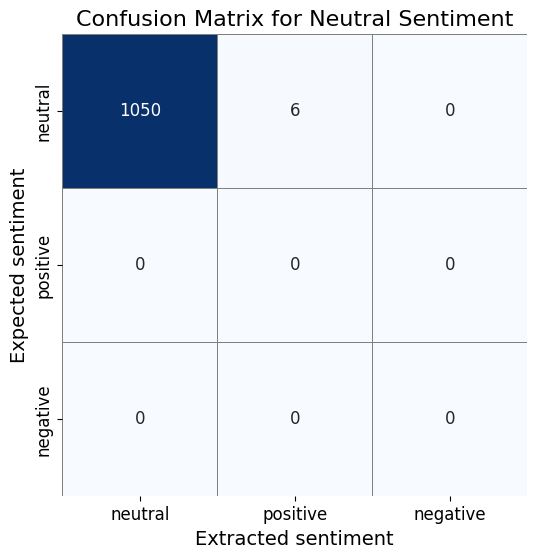

In [5]:
# Prepare the data
true_labels = df['original_label']
predicted_labels = df['original_sentiment_label']

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=["NEU", "POS", "NEG"])

# Plot the confusion matrix
plt.figure(figsize=(6, 6))  # Larger figure size
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["neutral", "positive", "negative"], yticklabels=["neutral", "positive", "negative"], linewidths=0.5, linecolor='gray', cbar=False, annot_kws={"size": 12})
plt.title('Confusion Matrix for Neutral Sentiment', fontsize=16)
plt.xlabel('Extracted sentiment', fontsize=14)
plt.ylabel('Expected sentiment', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig(img_path + f'{corpus}-confusion_matrix-neutral-sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

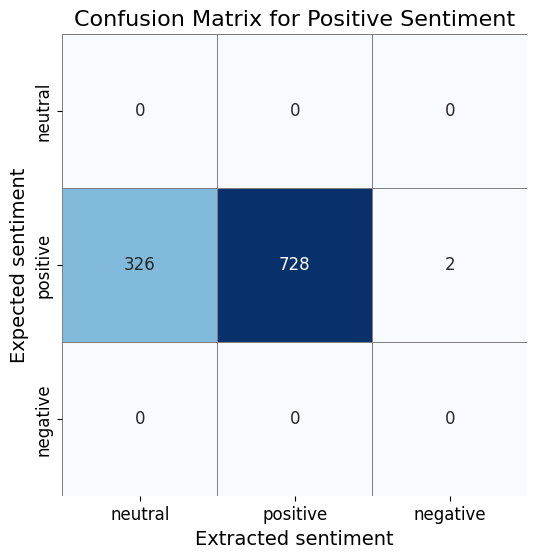

In [6]:
# Prepare the data
true_labels = df['positive_label']
predicted_labels = df['positive_sentiment_label']

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=["NEU", "POS", "NEG"])

# Plot the confusion matrix
plt.figure(figsize=(6, 6))  # Larger figure size
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["neutral", "positive", "negative"], yticklabels=["neutral", "positive", "negative"], linewidths=0.5, linecolor='gray', cbar=False, annot_kws={"size": 12})
plt.title('Confusion Matrix for Positive Sentiment', fontsize=16)
plt.xlabel('Extracted sentiment', fontsize=14)
plt.ylabel('Expected sentiment', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig(img_path + f'{corpus}-confusion_matrix-positive-sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

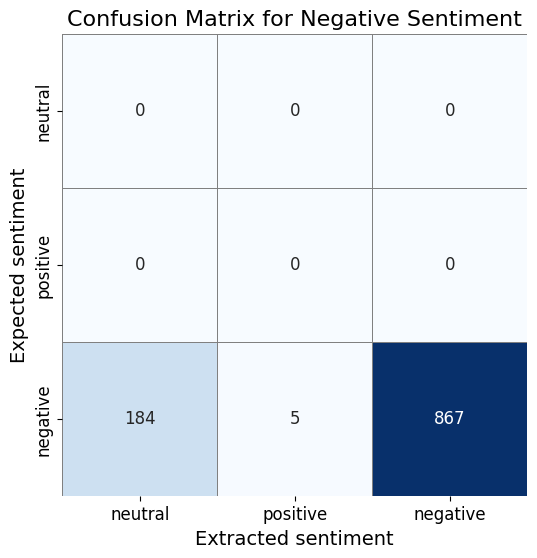

In [7]:
# Prepare the data
true_labels = df['negative_label']
predicted_labels = df['negative_sentiment_label']

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=["NEU", "POS", "NEG"])

# Plot the confusion matrix
plt.figure(figsize=(6, 6))  # Larger figure size
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["neutral", "positive", "negative"], yticklabels=["neutral", "positive", "negative"], linewidths=0.5, linecolor='gray', cbar=False, annot_kws={"size": 12})
plt.title('Confusion Matrix for Negative Sentiment', fontsize=16)
plt.xlabel('Extracted sentiment', fontsize=14)
plt.ylabel('Expected sentiment', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig(img_path + f'{corpus}-confusion_matrix-negative-sentiment.png', dpi=300, bbox_inches='tight')
plt.show()